In [1]:
# 필요한 패키지 및 설치 및 임포트
    
!pip install ploty
!pip install pywaffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


     --------------------------------------- 25.2/25.2 MB 11.3 MB/s eta 0:00:00


In [4]:
# 데이터 불러오기
df = pd.read_csv('six_countries_height_samples.csv')
# 데이터 샘플 확인
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


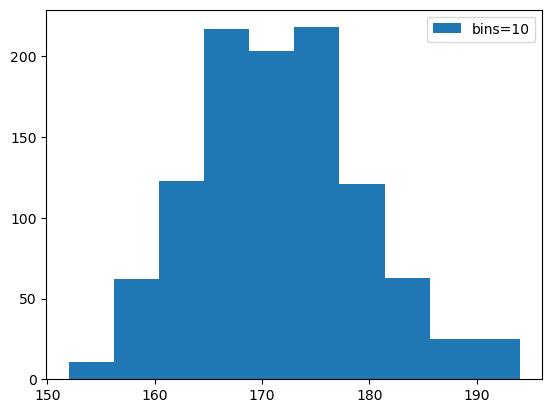

In [5]:
# 전체 신장 데이터 히스트그램 시각화

# 신장 컬럼만 필터링
df1 = df[['height_cm']]

# 10cm 단위로 히스트그램 시각화
plt.hist(df1, bins=10, label='bins=10')
plt.legend()
plt.show()

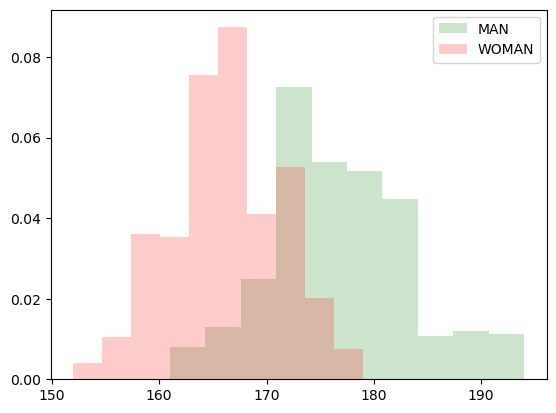

In [6]:
# 남성 여성 히스트그램 시각화

# 남성 여성 별도 데이터셋 새엇ㅇ
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1[['height_cm']]
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2[['height_cm']]

# 10cm 단위로 남성, 여성 신장 히스트그램 시각화
plt.hist(df1_1, color='green', alpha = 0.2, bins = 10, label = 'MAN', density= True)
plt.hist(df1_2, color='red',alpha = 0.2, bins = 10, label = 'WOMAN', density= True)
plt.legend()
plt.show()

In [8]:
# 파이차트, 도넛차트 시각화를 위한 데이터 전처리

df2 = df[['country', 'height_cm']]
# 키 175 이상만 추출
df2=df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


In [9]:
# 다음으로 파이차트와 도넛차트 시각화를 위해 국가별로 신장 175cm 이상인 샘플의 수를 산출한다.

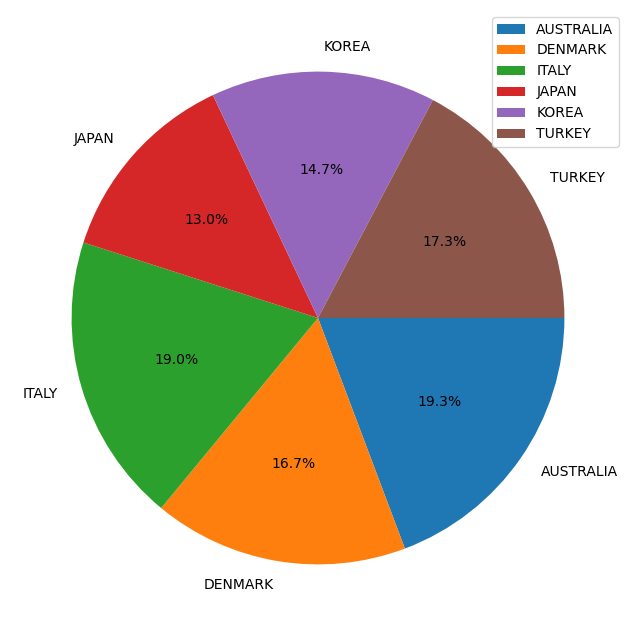

In [11]:
# 파이차트 시각화

fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 배경색 설정
ax = fig.add_subplot() # 프레임 생성

# 파이차트 출력
ax.pie(df2.height_cm,
       labels=df2.country,
       startangle=0,
       counterclock=False,
       autopct=lambda p : '{:.1f}%'.format(p) # 퍼센트 자리수 설정
)

plt.legend() # 범레 표시
plt.show()

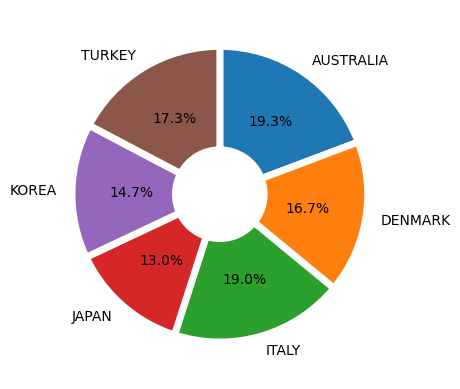

In [13]:
# 도넛차트 시각화

# 차트 형태 옵션 서정
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(df2.height_cm, labels=df2.country, autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.show(
    
)

In [14]:
# 트리맵 차트용 데이터셋 전처리

df3 = df[['country','sex', 'height_cm']]
df3=df3[df.height_cm >= 175]
# 국가, 성별 단위 신장 175cm 이상 카운팅
df3 = df3.groupby(['country','sex']).count().reset_index()

df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [20]:
# 트리맵 차트 시각화

fig = px.treemap(df3,
                 path=['sex','country'],
                 values='height_cm',
                 color='height_cm',
                 color_continuous_scale='viridis')

fig.show()

In [ ]:
# 와플차트 시각화

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values'; df2['height_cm'],
            'labels' : 
        }
    }
)